<a href="https://colab.research.google.com/github/shreyyy12/Mask-recognition1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


original image:


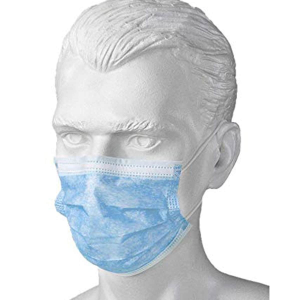

final image after mask detection:


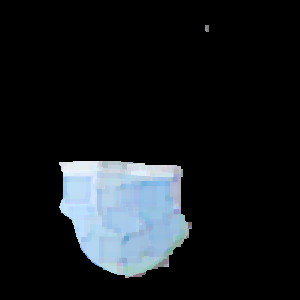

original image:


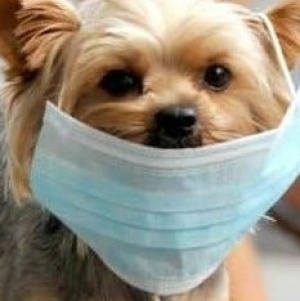

final image after mask detection:


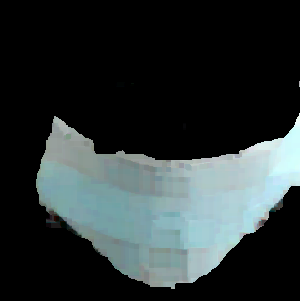

original image:


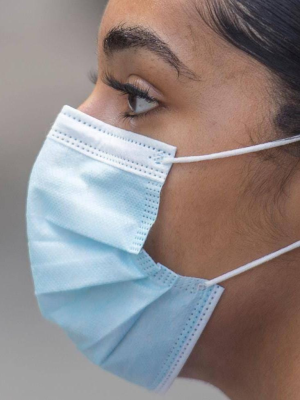

final image after mask detection:


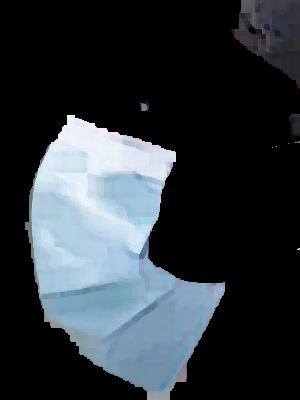

original image:


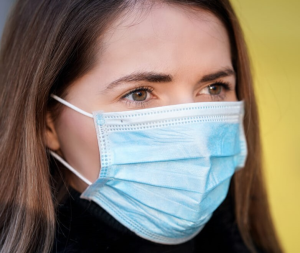

final image after mask detection:


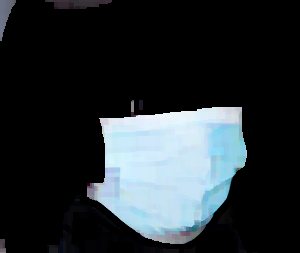

original image:


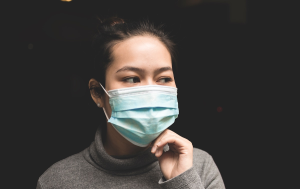

final image after mask detection:


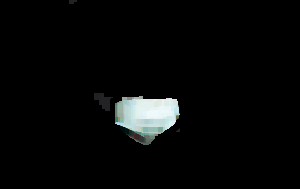

original image:


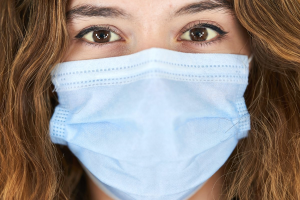

final image after mask detection:


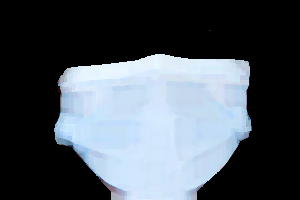

original image:


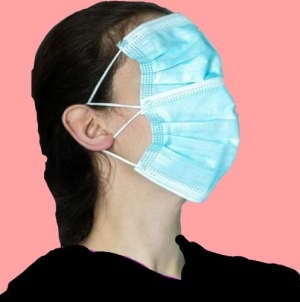

final image after mask detection:


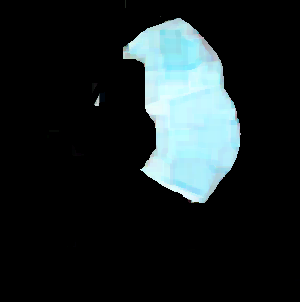

original image:


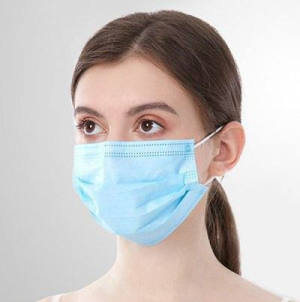

final image after mask detection:


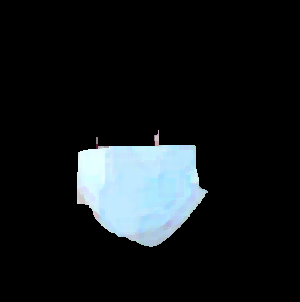

original image:


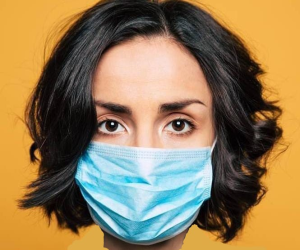

final image after mask detection:


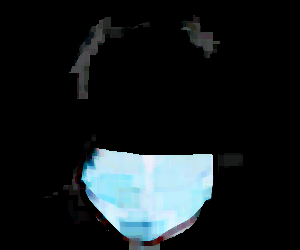

original image:


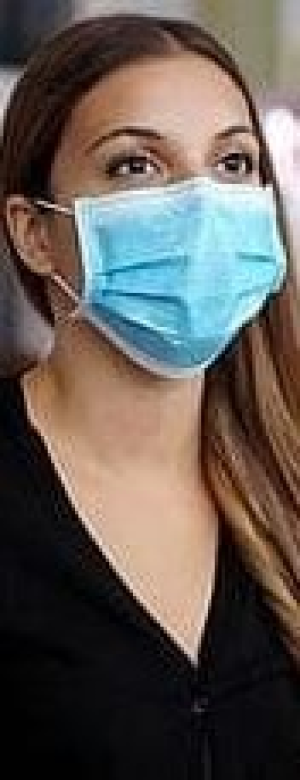

final image after mask detection:


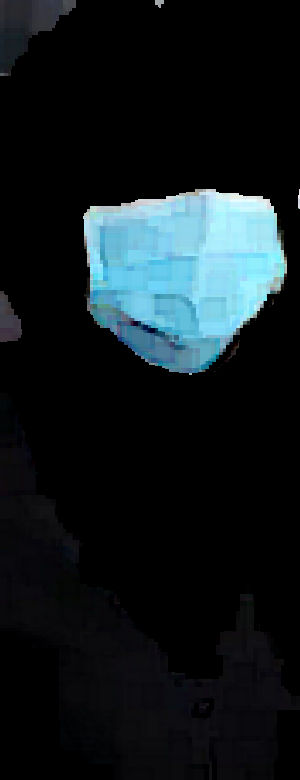

In [2]:

# importing all necessary modules
import cv2 as cv
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import os
from os import listdir
import numpy as np
import pandas as pd

#getting the folder of images from drive
folder = r'/content/drive/MyDrive/project/'

#traversing through all images in the folder
for filename in os.listdir(folder) :
    VALID_FORMAT = (".jpg", ".JPG", ".jpeg", ".JPEG", ".png", ".PNG")
    if filename.upper().endswith(VALID_FORMAT):
              path = folder + filename
              image = cv.imread(path) #reading the image

              # resize image
              frame = imutils.resize(image, width=300)

              # show the image
              print("original image:")
              cv2_imshow(frame)
              hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)#converting bgr to hsv colour space

              #defining surgical mask blue limits
              bl=np.array([60,10,5])
              bu=np.array([157,250,255])

              #creating mask for the blue region
              mask = cv.inRange(hsv,bl,bu)

              #performing bitwise and for mask and image to get the blue region
              res = cv.bitwise_and(frame, frame, mask=mask)


              #performing closing morphological operation to remove noise
              kernel = np.ones((6,6), np.uint8)
              closing = cv.morphologyEx(res, cv.MORPH_CLOSE, kernel,iterations=3)


              #defining a sharpening kernel to increase intensity of image
              kernel = [[0,-1,0],[-1,5,-1],[0,-1,0]]
              A = np.squeeze(np.asarray(kernel))
              dst = cv.filter2D(closing, -1, A)

              #performing morphological erosion to sharpen the image
              kernel = np.ones((5,5),np.uint8)
              erosion = cv.erode(dst,kernel,iterations = 1)

              #showing final image
              print("final image after mask detection:")
              cv2_imshow(erosion)

              cv.destroyAllWindows()
              cv.waitKey(30)